In [1]:
%matplotlib inline
%precision %.6f
%pylab inline
pylab.rcParams['figure.figsize'] = (7.5, 7.5)
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('seaborn')
#print(plt.style.available)
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


# Exploratory data analysis for springboard's data science career track
# 1st Capstone project "Exploring Netflix’s movie recommendation system"

The purpose of this exploratory data analysis is to identify possible variables in the Netflix Prize Data set
that could potentially act as important factors in predicting movie ratings.

In [87]:
# The following part loads the data frame containing the movies name, id, year of release, and genre information
df_movies = pd.read_csv('movies_plus_genre_info_2.csv')
df_movies.index.name = 'MovieID'
df_movies.index = np.arange(1, len(df_movies)+1)
df_movies.head(5)

,Name,Year,Genres,Sci-Fi,Crime,Romance,Animation,Music,Comedy,War,...,Action,Documentary,Musical,History,Family,Reality-TV,Fantasy,Game-Show,Sport,Biography
1,Dinosaur Planet,2003,"Documentary, Animation, Family",N,N,N,Y,N,N,N,...,N,Y,N,N,Y,N,N,N,N,N
2,Isle of Man TT 2004 Review,2004,None,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
3,Character,1997,"Crime, Drama, Mystery",N,Y,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
4,Paula Abdul's Get Up & Dance,1994,None,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
5,The Rise and Fall of ECW,2004,None,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N


In [88]:
#The following will load the dataframe with the ratings data
df_data = pd.read_csv('ratings_plus_genre_info.csv')
df_data.head()

,User ID,Rating,Date,Movie ID,Year of Release,Genre
0,1488844,3,2005-09-06,1,2003,"Documentary, Animation, Family"
1,822109,5,2005-05-13,1,2003,"Documentary, Animation, Family"
2,885013,4,2005-10-19,1,2003,"Documentary, Animation, Family"
3,30878,4,2005-12-26,1,2003,"Documentary, Animation, Family"
4,823519,3,2004-05-03,1,2003,"Documentary, Animation, Family"


For the Genre column in the previous 2 data frames, an entry  of 'None', means that we were not able to retrieve movie 
info from the OMDB api. Of note,this columns is of string type, that is, 'None' is actually a string a not a None type

In [4]:
data_by_rating = df_data.groupby('Rating').size() * 100 / len(df_data)
data_by_rating

Rating
1     4.595906
2    10.083627
3    28.673469
4    33.589558
5    23.057439
dtype: float64

# What is the overall distribution of the movie ratings?
Since we want to eventually predict movie ratings, we should first look at the overall distribution of the movie ratings.

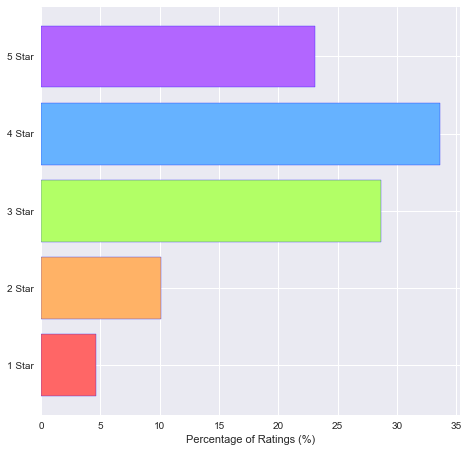

In [5]:
labels = ('1 Star', '2 Star', '3 Star', '4 Star', '5 Star')
y_pos = np.arange(len(labels))
n_of_ratings = data_by_rating.values
fig, ax = plt.subplots(figsize = (7.5, 7.5))
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)

plt.barh(y_pos, n_of_ratings, align='center', color=['#FF6666', '#FFB266','#B2FF66', '#66B2FF', '#B266FF'], edgecolor = 'b')
plt.xlabel('Percentage of Ratings (%)')
plt.show()

In [6]:
print('The average rating is : ' + str(np.mean(df_data.Rating)))
print('The standar deviation for the ratings is : ' + str(np.std(df_data.Rating)))

The average rating is : 3.60428996442
The standar deviation for the ratings is : 1.08521856019


The above bar plot shows that the most frequent movie rating is 4 stars. We can also see that
the majortiy of the ratings (~ 56%)  received a good rating (4 or 5 Stars). Overall, the average
movie rating is ~ 3.6 Stars, with  a standar deviation of ~1.09 Stars.


# What is the distribution of average user ratings? Do some users have a bias when giving ratings?
It could be posible that specific users have an overall bias towards giving positive or negative movie ratings.
Therefore, we should also look at what the distribution of user average movie ratings look like.

In [7]:
#this part groups the data by user id applying the mean() function
data_by_user_m = df_data.groupby('User ID').mean()
#this part groups the data by user id applying the count() function
data_by_user_c = df_data.groupby('User ID').count()

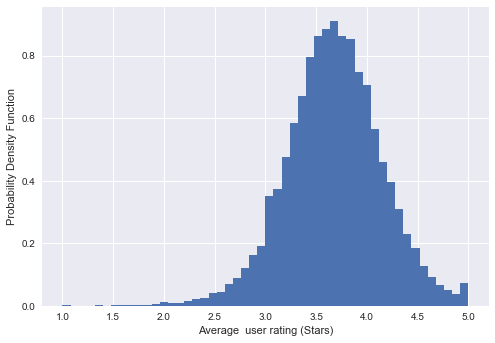

In [8]:
values, bins, _ = plt.hist(data_by_user_m['Rating'].values, bins = 50, normed = True)
area = sum(np.diff(bins)*values)
plt.xlabel('Average  user rating (Stars)')
plt.ylabel('Probability Density Function')
plt.show()

In [9]:
stats.normaltest(data_by_user_m['Rating'].values)

NormaltestResult(statistic=12510.954664932149, pvalue=0.0)

Looking at the above histogram, it seems that the average user rating is normally distributed.
Indeed, the pvalue (pvalue < 0.05) from the normality test that we run above, confirms this observation.

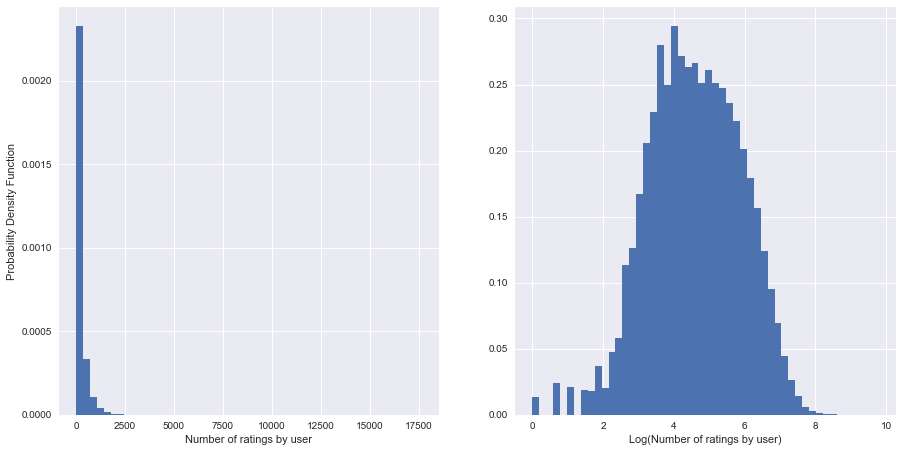

In [10]:
fig = plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.hist(data_by_user_c['Rating'].values, bins = 50, normed = True)
plt.ylabel('Probability Density Function')
plt.xlabel('Number of ratings by user')

plt.subplot(1,2,2)
plt.hist(np.log(data_by_user_c['Rating'].values), bins = 50, normed = True)
plt.xlabel('Log(Number of ratings by user)')

plt.show()

In [11]:
stats.normaltest(np.log(data_by_user_c['Rating'].values))

NormaltestResult(statistic=3443.7109189009279, pvalue=0.0)

In [12]:
print('The maximum number of ratings by any user is : ' + str(max(data_by_user_c['Rating'].values)))
print('The minimum number of ratings by any user is : ' + str(min(data_by_user_c['Rating'].values)))
print('The average number of ratings by a single user: ' + str(np.mean(data_by_user_c['Rating'].values)))

The maximum number of ratings by any user is : 17653
The minimum number of ratings by any user is : 1
The average number of ratings by a single user: 209.25199661


Note, that in order to better visualize the distribution of the total number of ratings, the data was Log transformed
(with the np.log() function; right side plot).
The log transformed data is normally distributed(as evidenced by a pvalue < 0.05 returned by the normality test).
In addition a single user rated on average ~ 209 movies

If we assume that users with an average ratings of above 4 Stars or below 3 Starsl average 
have a positive or negative bias when evaluating movies, then we can make the following calculation:

In [13]:
with_bias = np.sum((data_by_user_m['Rating'] > 4)) + np.sum((data_by_user_m['Rating'] < 3))
without_bias = len(data_by_user_m['Rating']) - with_bias

print('% with bias : ' + str(100*with_bias/len(data_by_user_m['Rating'])))
print('% without bias : ' + str(100*without_bias/len(data_by_user_m['Rating'])))

% with bias : 29
% without bias : 70


Under the above assumptions, we can see that ~30% of users have a bias when rating movies.
Thus, it could potentially be interesting to have a movie rating predictive model, that includes a user-specific  bias.

# Does the movie release year have an effect on ratings?
Movies released on different years might be of different qualities, hence  release year might be an important 
factor in determining movie ratings.



In [14]:
#this part groups the data by user id applying the count() function
data_by_year_c = df_data.groupby('Year of Release').count().apply(np.sqrt)
data_by_year_m = df_data.groupby('Year of Release').mean() #average rating by year
data_by_year_s = df_data.groupby('Year of Release').std() #rating standar deviation by year
se = data_by_year_s['Rating']/data_by_year_c['Rating'] #standar error

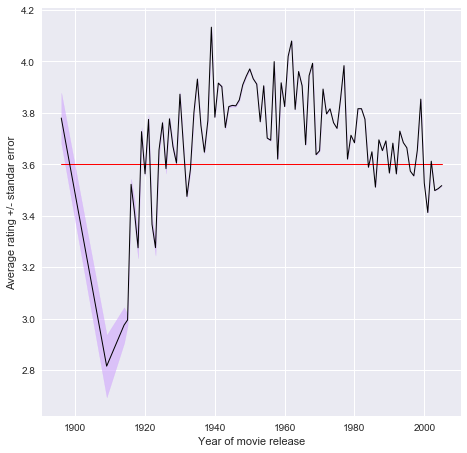

In [15]:
fig = plt.figure(figsize=(7.5,7.5))
x = data_by_year_m.index.values
y = data_by_year_m['Rating'].values
error = se.values
y += np.random.normal(0, 0.1, size=y.shape)

plt.plot(x, [3.6]*94, color = 'r', linewidth = 1)
plt.plot(x, y, color = 'k', linewidth = 1)
plt.fill_between(x, y-error, y+error, alpha = 0.5, color = '#CC99FF')
plt.xlabel('Year of movie release')
plt.ylabel('Average rating +/- standar error')
plt.show()

The previous plot shows the average rating for each year (black line), +/- the standar error (shaded region around black line). 
The red line represents the overall average rating (~3.6 Stars). The small standar error for most years, 
shows that the average rating on that year is different than the overall average rating. This suggests that the year in which
the movie was released may be an important factor affecting the rating predictions.

To determine if the average ratings of movie from a particular year differ from the overall average rating, 
we can extract all the ratings from a specific year of movie release and use a one sample t-test to compare them 
to the overall average (considering pvalues < 0.001 as indicating significance)

In [35]:
sig = []
mean = []
count = 0
for year in data_by_year_m.index.values:
    d = df_data[df_data['Year of Release'] == year]
    d['Rating'].values
    t,p = stats.ttest_1samp(d['Rating'].values,np.mean(df_data['Rating'].values)) 
    if p < 0.001:
        sig.append('Y')
        count += 1
    else:
        sig.append('N')

In [36]:
print('Number of years with significant difference : ' +str(count))
print('Total number of years : ' + str(len(data_by_year_m.index.values)))

Number of years with significant difference : 89
Total number of years : 94


We can see that 89 out of the 94 different movie release year are significantly different than the overall averge.
Thus, the year in which a particular movie was release may have asignificant effect on the predictions of movie ratings.


## Does the day of the week have an effect on the rating?
It seems reasonable to suspect that people's mood may cahnge with the different days of the week, which in turn
might affect the prediction of ratings.

To investigate this, the first step is to convert the string containing the date of rating, 
into the respective day of the week

In [38]:
#First, we need to transform our date column (string), into a day of the week
days_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

dum = lambda x: datetime.strptime(x, '%Y-%m-%d').weekday()
df_data['weekday'] = df_data['Date'].apply(dum)
df_data['weekday'] = df_data['weekday'].map(days_dict)
df_data.head()

,User ID,Rating,Date,Movie ID,Year of Release,Genre,weekday
0,1488844,3,2005-09-06,1,2003,"Documentary, Animation, Family",Tuesday
1,822109,5,2005-05-13,1,2003,"Documentary, Animation, Family",Friday
2,885013,4,2005-10-19,1,2003,"Documentary, Animation, Family",Wednesday
3,30878,4,2005-12-26,1,2003,"Documentary, Animation, Family",Monday
4,823519,3,2004-05-03,1,2003,"Documentary, Animation, Family",Monday


In [39]:
data_by_day_m = df_data.groupby('weekday').mean()
data_by_day_c = df_data.groupby('weekday').count()

In [43]:
data_by_day_m.loc['Monday','Rating']

3.597735

In [76]:
labels = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
data = []
sig = []

for elem in labels:
    a = list(df_data[df_data['weekday'] == elem]['Rating'].values)
    t,p = stats.ttest_1samp(a,np.mean(df_data['Rating'].values)) 
    if p < 0.001:
        sig.append('Yes')
    else:
        sig.append('No')
        
    data.append(a)
    
means = map(np.mean, data)
se = map(stats.sem, data)
n_s = map(len, data)

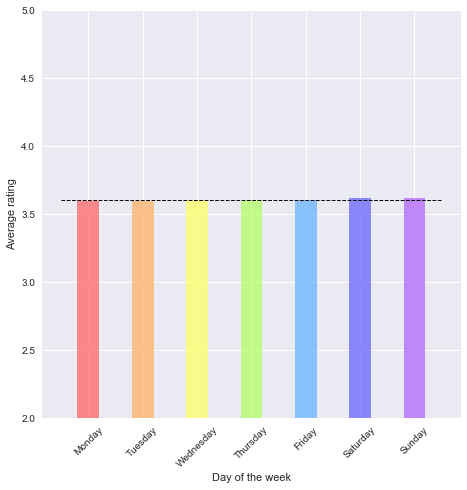

In [77]:
x_pos = list(range(1,2*len(data),2))
color=['#FF6666', '#FFB266', '#FFFF66','#B2FF66', '#66B2FF', '#6666FF', '#B266FF'] 

fig, ax = plt.subplots(figsize = (7.5, 7.5))

plt.plot([0,14],[np.mean(df_data['Rating'].values)]*2, linewidth = 1, color = 'k', linestyle = '--')
plt.bar(x_pos,
        # using the data from the mean_values
        means, 
        # with a y-error lines set as standar errors
        yerr=se, 
        # aligned in the center
        align='center',
        # with color
        color = color,
        # transparency
        alpha=.75)

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
plt.ylim(2,5)
plt.xticks(rotation=45)
plt.xlabel('Day of the week')
plt.ylabel('Average rating')
plt.show()

In [84]:
for i in range(len(labels)):
    print(labels[i] + ' average rating : ' + str(np.mean(data[i])))
    print('Was ' + labels[i] + ' different than the overall mean? : ' + sig[i])
    print(' ')

Monday average rating : 3.59773501062
Was Monday different than the overall mean? : Yes
 
Tuesday average rating : 3.59580838795
Was Tuesday different than the overall mean? : Yes
 
Wednesday average rating : 3.60472457466
Was Wednesday different than the overall mean? : No
 
Thursday average rating : 3.60430473069
Was Thursday different than the overall mean? : No
 
Friday average rating : 3.60589241374
Was Friday different than the overall mean? : Yes
 
Saturday average rating : 3.61475413024
Was Saturday different than the overall mean? : Yes
 
Sunday average rating : 3.61644876449
Was Sunday different than the overall mean? : Yes
 


When extracting the data from the main dataframe, a one sample t-test was used to asses if the ratings for a respective
day of the week were different from the overal mean(~3.6). Significant differences where  considered when pvalue <0.001

***: Note that for a better visualization that y-axis goes from 2 to 5.

From the list previously printed, we can see that ratings from Monday, Tuesday, Friday, Saturday and Sunday where
different thant the overall average. However when we look at the barplot above  we can see that, although some days
had ratings different than the average(~3.6; dashed black line in the barplot graph), the average rating for all days
of the week is very similar to the overall average (~3.6; see the printed values above). Also not

This suggests that the day of the week might not be an influential factor when predicting movie ratings.

# Is the rating of a movie affected by its genre?
The genre information included here is not originally from the Netflix prize data set, but was obtained 
from the Open Movie data base API (OMDb).

In [92]:
d1 = dict(zip(df_movies.index,df_movies['Genres'].values))
df_data['aux2'] = df_data['Movie ID'].map(d1)

In [93]:
df_data.head()

,User ID,Rating,Date,Movie ID,Year of Release,Genre,aux2
0,1488844,3,2005-09-06,1,2003,"Documentary, Animation, Family","Documentary, Animation, Family"
1,822109,5,2005-05-13,1,2003,"Documentary, Animation, Family","Documentary, Animation, Family"
2,885013,4,2005-10-19,1,2003,"Documentary, Animation, Family","Documentary, Animation, Family"
3,30878,4,2005-12-26,1,2003,"Documentary, Animation, Family","Documentary, Animation, Family"
4,823519,3,2004-05-03,1,2003,"Documentary, Animation, Family","Documentary, Animation, Family"


In [101]:
a = len(df_data[df_data['aux2'] == 'None'])
b = len(df_data)
m = (100*a)/b
print('% of ratings with no Genre information : ' + str(m))

% of movies with no Genre information : 10


Not every movie in the netflix prize data set, has information available from the OMDb. However, doing a quick 
calculation we can see that only ~10% of the total ratings lack the respective genre information. 
Given the large size of the present data set, one could potetially exclude those 10% observations, and create 
rating predictions that consider the movie's genre'

In [103]:
genres = df_movies.columns[3:]
print(genres)

Index([u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Comedy',
       u'War', u'Horror', u'Film-Noir', u'Adventure', u'News', u'Western',
       u'Thriller', u'Adult', u'Mystery', u'Short', u'Talk-Show', u'N/A',
       u'Drama', u'Action', u'Documentary', u'Musical', u'History', u'Family',
       u'Reality-TV', u'Fantasy', u'Game-Show', u'Sport', u'Biography'],
      dtype='object')


In [139]:
#In the following lines we will extract the ratins associated with a respective genre
#In addition, a 1-sample t-test will be run  to asses if the ratings of movies from a specific genre
#differ from the overall rating (~3.6)

ratings_by_genre = dict()

for elem in genres:
    d = dict(zip(df_movies.index,df_movies[elem].values))
    df_data['aux'] = df_data['Movie ID'].map(d)
    delta = df_data[df_data['aux'] == 'Y']
    ratings_by_genre[elem] = list(delta['Rating'].values)
    
to_plot = []
count = 0
sig = []

#One sample t-test
for key in ratings_by_genre.keys():
    t,p = stats.ttest_1samp(ratings_by_genre[key],np.mean(df_data['Rating'].values)) 
    if p < 0.001:
        sig.append('Yes')
        count += 1
    else:
        sig.append('No')
    to_plot.append(ratings_by_genre[key])

means = map(np.mean, to_plot)
se = map(stats.sem, to_plot)
n_s = map(len, to_plot)

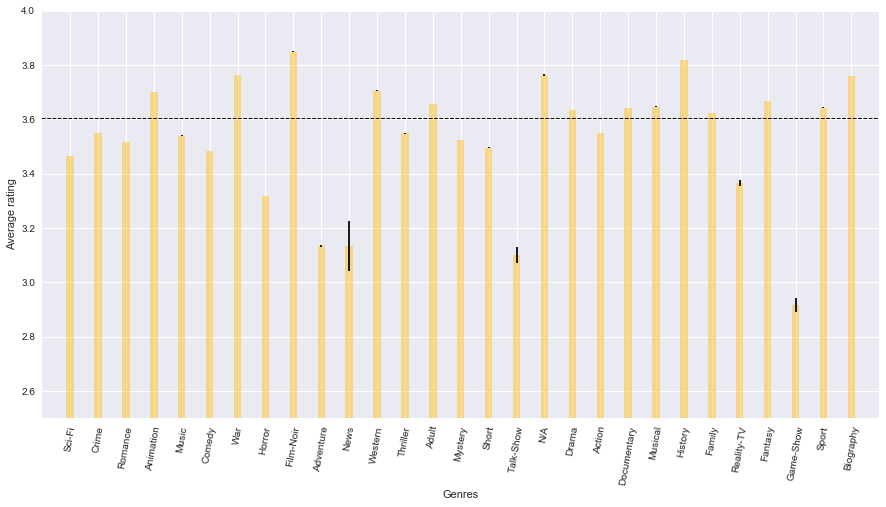

In [140]:
x_pos = list(range(1,3*len(genres),3))

fig, ax = plt.subplots(figsize = (15, 7.5))
plt.plot([-10,100],[np.mean(df_data['Rating'].values)]*2, linewidth = 1, color = 'k', linestyle = '--')
plt.bar(x_pos,
        # using the data from the mean_values
        means, 
        # with a y-error lines set at variance
        yerr=se, 
        # aligned in the center
        align='center',
        # with color
        color='#FFC222',
        # alpha 0.5
        alpha=0.5)


ax.set_xticks(x_pos)
ax.set_xticklabels(genres)
plt.xlim(-2,88)
plt.ylim(2.5,4.0)
plt.xticks(rotation=80)
plt.xlabel('Genres')
plt.ylabel('Average rating')
plt.show()

In [142]:
print(str(count) + ' out of ' + str(len(sig)) + ' genres differ from the overall mean')

29 out of 29 genres differ from the overall mean


The bar plot above (average genre rating +/- standar error), strongly suggests that the genre of a movie affects
the rating of that type of movie. In fact, with the 1-sample t-test run on previous steps, it was possible to determine 
that all of the genres differ from the overall mean(black dashed line).
While some genres, like Family, don't differ much from the overal m average rating, other genres, like Game-Show,
show much bigger differences.

*** Note that for better visualization, the scale of the y-axis goes from 2.5 to 4

# Conclusion:
After performing this EDA, it can be concluded that factors such as 'User specific bias', 'Year of movie release' and
'Movie's Genre' significantly affect the rating of movies, thus, they can potentiality be incorporated into a predictive model for movie preferences and ratings